# 基于天气数据集的XGBoost实战

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

## Step1：函数库导入

In [45]:
# 导入常用库函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [46]:
# 天气数据读取/载入
data = pd.read_csv('cloud.csv')


In [12]:
# 数据信息简单查看
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [23]:
##  进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
print(data.head().isna())
data.tail()


    Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  False     False    False    False     False         True      True   
1  False     False    False    False     False         True      True   
2  False     False    False    False     False        False     False   
3  False     False    False    False     False        False     False   
4  False     False    False    False     False        False     False   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0        False          False       False  ...        False        False   
1        False          False       False  ...        False        False   
2        False          False       False  ...        False        False   
3        False          False       False  ...        False        False   
4        False          False       False  ...        False        False   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0         True         T

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106639,2011/5/23,Launceston,10.1,16.1,15.8,NaN,NaN,SE,31.0,NNW,...,99.0,86.0,999.2,995.2,NaN,NaN,13.0,15.6,Yes,Yes
106640,2014/12/9,GoldCoast,19.3,31.7,36.0,NaN,NaN,SE,80.0,NNW,...,75.0,76.0,1013.8,1010.0,NaN,NaN,26.0,25.8,Yes,Yes
106641,2014/10/7,Wollongong,17.5,22.2,1.2,NaN,NaN,WNW,65.0,WNW,...,61.0,56.0,1008.2,1008.2,NaN,NaN,17.8,21.4,Yes,No
106642,2012/1/16,Newcastle,17.6,27.0,3.0,NaN,NaN,NaN,NaN,NE,...,68.0,88.0,NaN,NaN,6.0,5.0,22.6,26.4,Yes,No
106643,2014/10/21,AliceSprings,16.3,37.9,0.0,14.2,12.2,ESE,41.0,NNE,...,8.0,6.0,1017.9,1014.0,0.0,1.0,32.2,35.7,No,No


In [18]:
# 发现存在缺省值，我们需要对其进行处理，可采用中位数填补、平均数填补，此处选择填补'-1'值
data = data.fillna(-1)
data.tail()
'''与上一区块进行对比，可以发现Nan项变为'-1'.'''

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106639,2011/5/23,Launceston,10.1,16.1,15.8,-1.0,-1.0,SE,31.0,NNW,...,99.0,86.0,999.2,995.2,-1.0,-1.0,13.0,15.6,Yes,Yes
106640,2014/12/9,GoldCoast,19.3,31.7,36.0,-1.0,-1.0,SE,80.0,NNW,...,75.0,76.0,1013.8,1010.0,-1.0,-1.0,26.0,25.8,Yes,Yes
106641,2014/10/7,Wollongong,17.5,22.2,1.2,-1.0,-1.0,WNW,65.0,WNW,...,61.0,56.0,1008.2,1008.2,-1.0,-1.0,17.8,21.4,Yes,No
106642,2012/1/16,Newcastle,17.6,27.0,3.0,-1.0,-1.0,-1,-1.0,NE,...,68.0,88.0,-1.0,-1.0,6.0,5.0,22.6,26.4,Yes,No
106643,2014/10/21,AliceSprings,16.3,37.9,0.0,14.2,12.2,ESE,41.0,NNE,...,8.0,6.0,1017.9,1014.0,0.0,1.0,32.2,35.7,No,No


In [26]:
## 目标为检测出明天是否下雨（标签为RainTomorrow）
# 查看标签数量
pd.Series(data['RainTomorrow']).value_counts()
'''发现问题：数据非常不平衡，在某些情况下需要进行特殊处理'''

RainTomorrow
No     82786
Yes    23858
Name: count, dtype: int64

In [27]:
## 对于特征进行一些统计描述
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,106183.000000,106413.000000,105610.000000,60974.000000,55718.000000,99702.000000,105643.000000,104653.000000,105327.000000,103932.000000,96107.000000,96123.000000,66303.000000,63691.000000,105983.000000,104599.000000
mean,12.186148,23.235895,2.346357,5.479721,7.630220,39.972227,13.992929,18.631898,68.802377,51.438181,1017.651975,1015.254297,4.438487,4.501515,16.989344,21.692755
std,6.399877,7.127716,8.413614,4.211778,3.785116,13.599543,8.873860,8.805657,19.093677,20.806300,7.105074,7.035537,2.886585,2.718442,6.497898,6.945127
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.300000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,31.900000,48.100000,268.600000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.200000


In [29]:
## 可视化描述
# 选择数字特征
numerical_features = [x for x in data.columns if data[x].dtype == np.float64]
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [35]:
# 选择非数字特征
category_features = [x for x in data.columns if data[x].dtype != np.float64 and x != 'RainTomorrow']
category_features

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

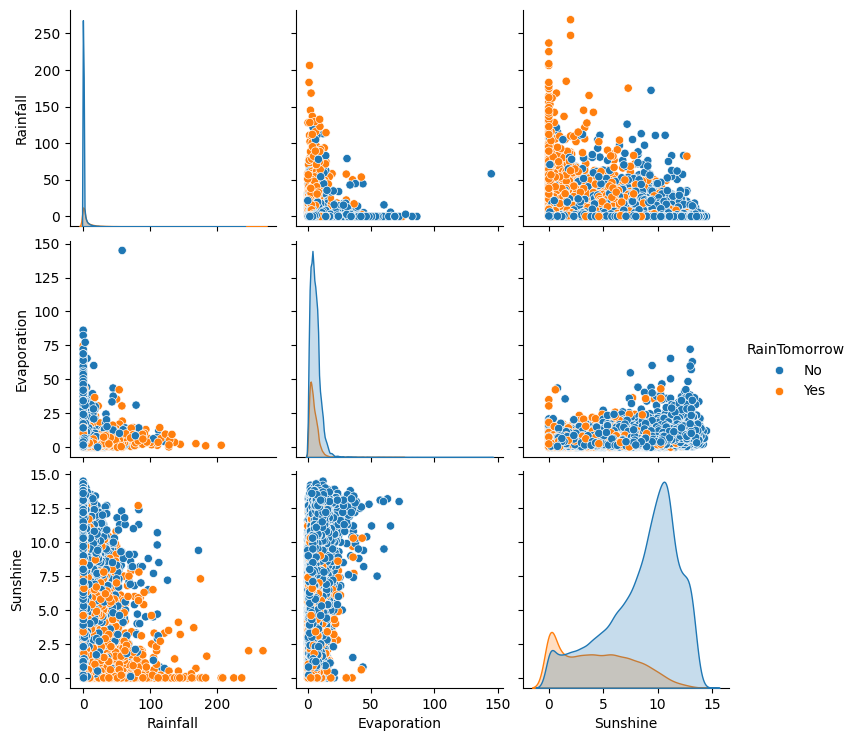

In [43]:
sns.pairplot(data=data[['Rainfall','Evaporation','Sunshine',] + ['RainTomorrow']], diag_kind='auto', hue= 'RainTomorrow')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于第二天下雨与不下雨的散点分布，以及大概的区分能力。相对的Sunshine与其他特征的组合更具有区分能力

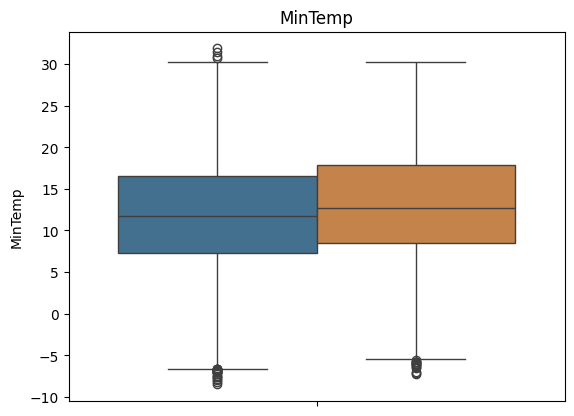

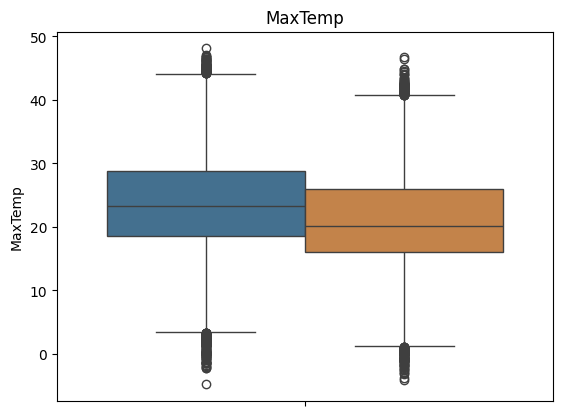

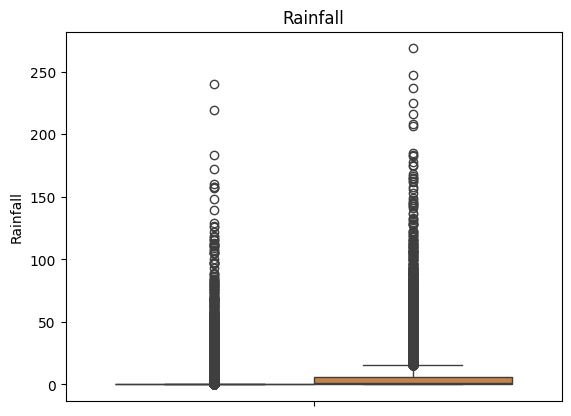

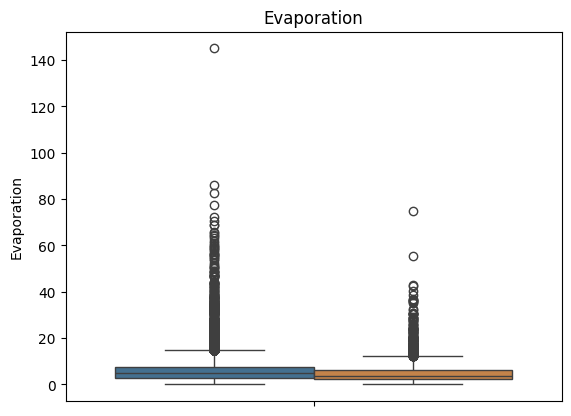

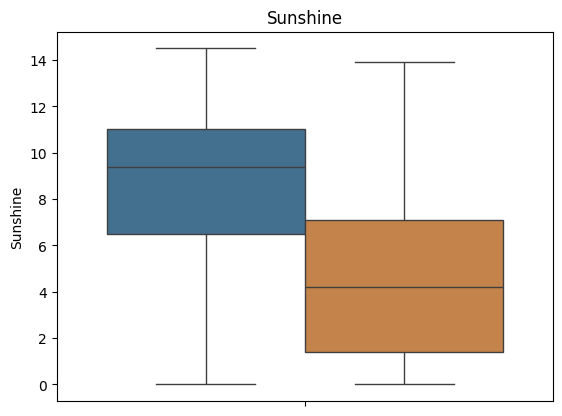

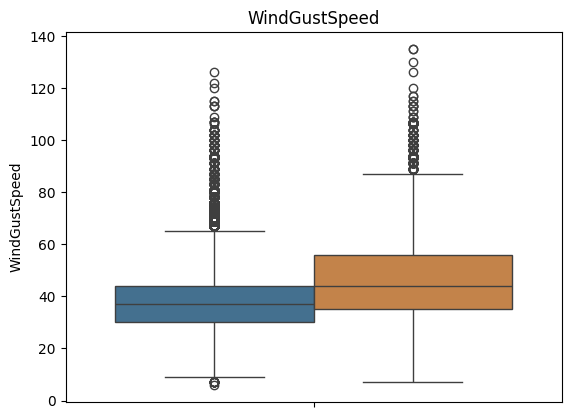

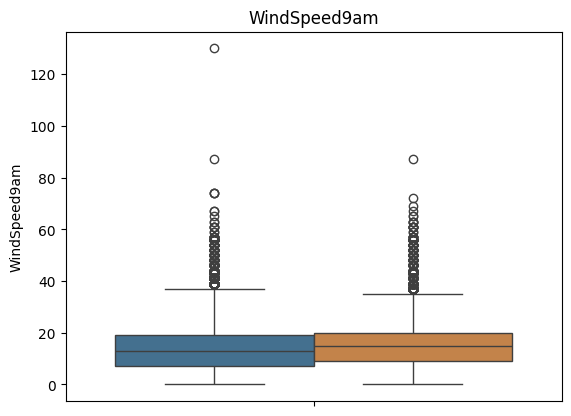

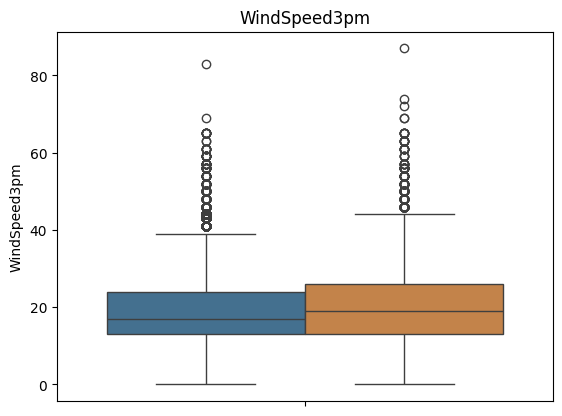

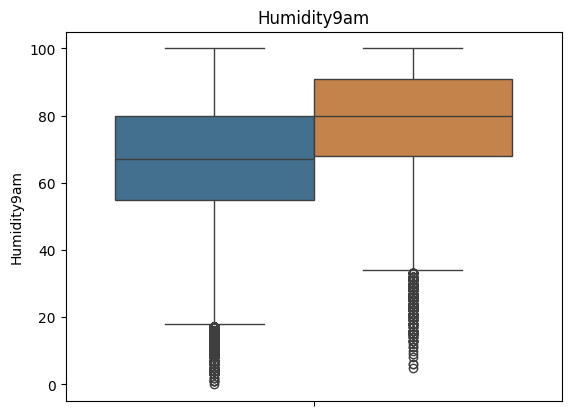

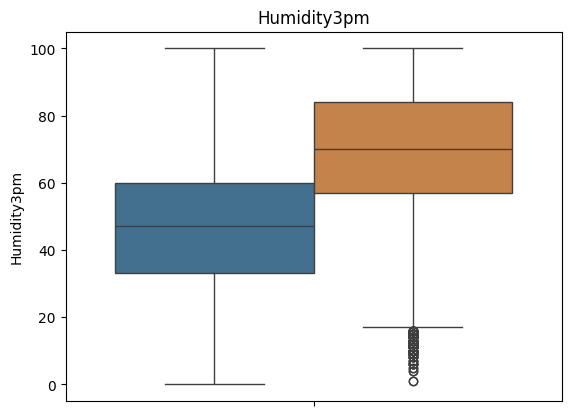

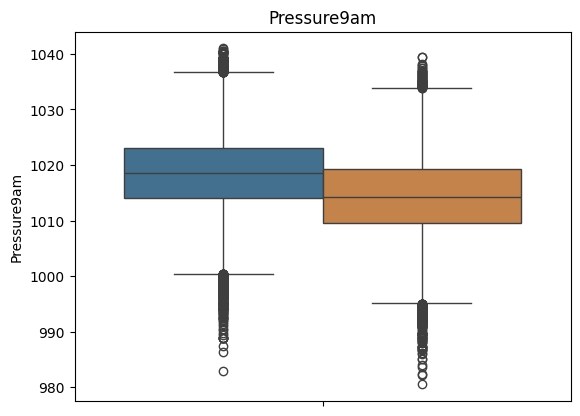

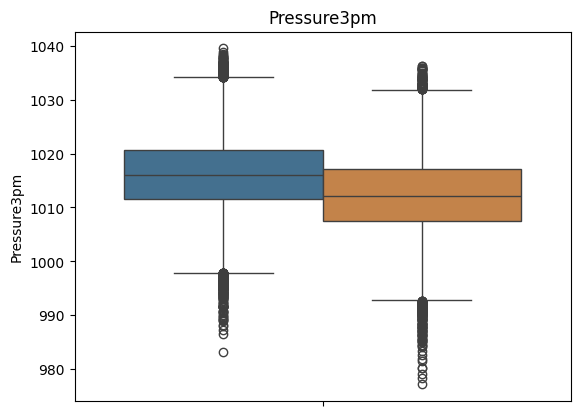

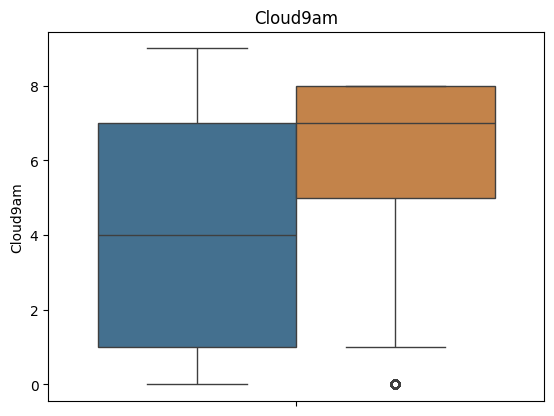

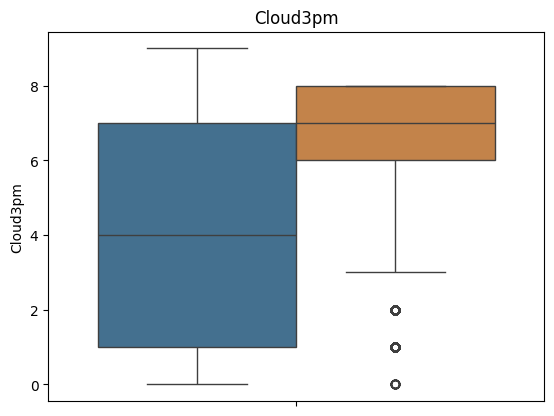

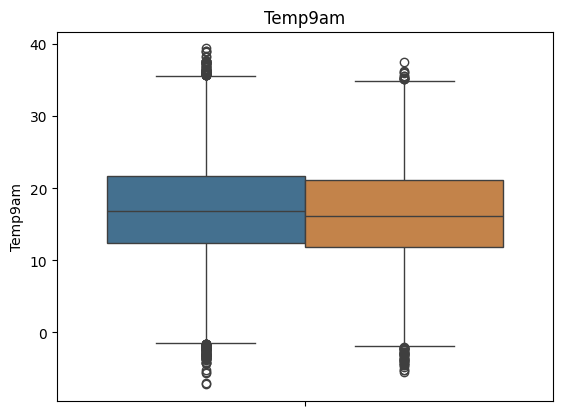

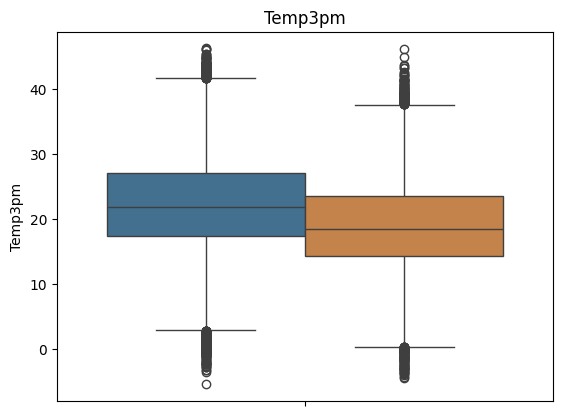

In [53]:
for col in numerical_features:
    sns.boxplot( y=col, saturation=0.5, hue='RainTomorrow', data=data,legend=False)
    plt.title(col)
    plt.show()

利用箱型图，可以得到不同特征的统计性质对标签“RainTomorrow”的影响  
容易得到影响较大的因子，Sunshine（大）、Humidity9am（中）、Humidity3am（大）、cloud9am（大）、cloud3am（大）  
其中cloud9am、cloud3am的影响呈包含特点

In [86]:
tlog = {}
for i in category_features:
    tlog[i] = data[data['RainTomorrow'] == 'Yes'][i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data[data['RainTomorrow'] == 'No'][i].value_counts()
tlog

{'Date': Date
 2010/9/3      29
 2009/6/2      27
 2012/7/10     27
 2015/9/2      27
 2013/6/12     26
               ..
 2008/10/5      1
 2015/10/6      1
 2010/1/15      1
 2007/11/30     1
 2008/9/16      1
 Name: count, Length: 3163, dtype: int64,
 'Location': Location
 Portland            818
 Walpole             722
 Cairns              700
 MountGambier        692
 Dartmoor            679
 CoffsHarbour        677
 NorfolkIsland       669
 Albany              665
 Witchcliffe         663
 Darwin              645
 Sydney              642
 MountGinini         623
 NorahHead           607
 Ballarat            597
 Hobart              579
 SydneyAirport       573
 GoldCoast           569
 Watsonia            567
 Newcastle           555
 Wollongong          542
 Williamtown         532
 Brisbane            529
 Adelaide            513
 Launceston          506
 MelbourneAirport    493
 Sale                479
 Melbourne           478
 Canberra            475
 Perth               474

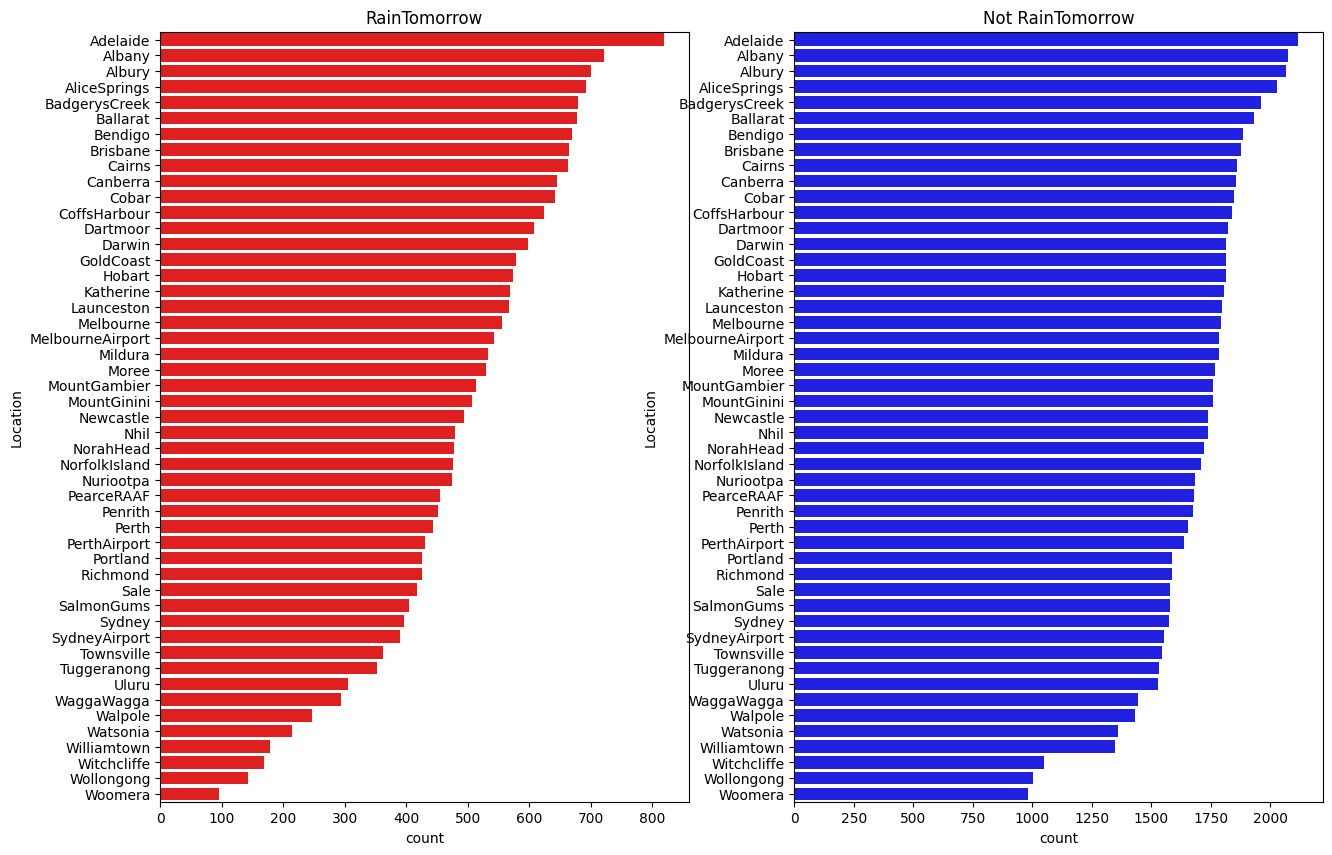

In [117]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['Location']).reset_index()['count'], y = pd.DataFrame(tlog['Location']).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['Location']).reset_index()['count'], y = pd.DataFrame(flog['Location']).sort_index().index, color = "blue")
plt.show()

  `tlog`格式为： `tlog = {'Location': pd.Series({'Sydney': 3, 'Melbourne': 2, 'Brisbane': 1}),...,'xx':pd.series({'1':1,'2':2,...})}`  
   如果你在打印`pd.DataFrame(tlog['Location'])`后发现 `DataFrame` 的第一行是 `count` ,这通常是因为在创建 `tlog` 字典时，你使用了` .value_counts()` 方法。`value_counts()` 方法返回一个 `Series`，其中索引是唯一值，而值是这些唯一值的计数。  
   当你将这个 `Series` 转换为 `DataFrame` 时，`Series`的索引（即唯一值）变成了 `DataFrame` 的索引，而 `Series` 的值（即计数）变成了 `DataFrame` 的列。

In [107]:
print(tlog['Location'].head())
print(pd.DataFrame(tlog['Location']).head())
print(pd.DataFrame(tlog['Location']).head().reset_index().sort_index())
print(pd.DataFrame(tlog['Location']).sort_index().index)

Location
Portland        818
Walpole         722
Cairns          700
MountGambier    692
Dartmoor        679
Name: count, dtype: int64
              count
Location           
Portland        818
Walpole         722
Cairns          700
MountGambier    692
Dartmoor        679
       Location  count
0      Portland    818
1       Walpole    722
2        Cairns    700
3  MountGambier    692
4      Dartmoor    679
Index(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura',
       'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
       'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith',
       'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums',
       'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru',
   

从上图可以发现不同地区降雨情况差别很大，有些地方明显更容易降雨

<AxesSubplot: title={'center': 'Not RainTomorrow'}, xlabel='count', ylabel='RainToday'>

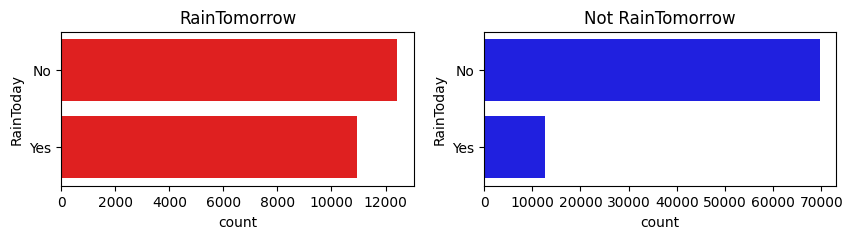

In [131]:
# 今天下雨是否与明天下雨有关联
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x=pd.DataFrame(tlog['RainToday']).reset_index()['count'], 
            y=pd.DataFrame(tlog['RainToday']).reset_index()['RainToday'],color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x=pd.DataFrame(flog['RainToday']).reset_index()['count'], 
            y=pd.DataFrame(flog['RainToday']).reset_index()['RainToday'],color = "blue")